## Project Three: Three Body System

Initial Condition
    1. Two Stationary Stars and One Body Introduced
        init_state: Star1_p = (-100, 0) v = (0, 0)
                    Star2_p = (100, 0)  v = (0, 0)
                    Planet_p = (50, 50) v = (0, -50) 
                    
        
    2. Two Stationary Stars and Two Bodies Introduced with pretty much the same condition(chaos)
    
    3. Binary Star System with Two Bodies Introduced
    
    Mass of Sun: 2 * 10^30 kg (2 kg)
    Mass of Earth: 6 * 10^24 kg (.02kg)
    G constant: 6.67*10^-11
    
   
    binary star orbits: https://en.wikipedia.org/wiki/Habitability_of_binary_star_systems
    wired article: https://www.wired.com/2016/06/way-solve-three-body-problem/
    

In [1]:
%matplotlib notebook
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

In [29]:
condition = Condition(m_s1 = 2,
                      m_s2 = 2,
                      m_p1 = .02,
                      G = 100000,
                      duration = 10,
                      dt = 0.01)

In [30]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # make the initial state
    init = State(x_s1=-100, y_s1=0, x_s2=100, y_s2=0, x_p1=50, y_p1=50, vx_s1=0, vy_s1=0, vx_s2=0, vy_s2=0, vx_p1=0, vy_p1=-50)
    
    # compute timestamps
    ts = linrange(0, duration, dt)
    
    return System(init=init, G = G, m_s1 = m_s1, m_s2 = m_s2, m_p1 = m_p1, ts=ts, dt = dt)

In [31]:
system = make_system(condition)

In [32]:
def slope_func_1(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
 n  m    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    x_s1, y_s1, x_s2, y_s2, x_p1, y_p1, vx_s1, vy_s1, vx_s2, vy_s2, vx_p1, vy_p1 = state
    unpack(system)
    
    pos_p1 = Vector(x_p1, y_p1)
    v_p1 = Vector(vx_p1, vy_p1)
    pos_s1 = Vector(x_s1, y_s1)
    pos_s2 = Vector(x_s2, y_s2)
    
    distance_p1s1 = pos_s1 - pos_p1
    distance_p1s2 = pos_s2 - pos_p1
    
    F_p1s1 = (G * m_s1 * m_p1 / (distance_p1s1.mag**2)) * distance_p1s1.hat()
    F_p1s2 = (G * m_s2 * m_p1 / (distance_p1s2.mag**2)) * distance_p1s2.hat()
    
    a_p1s1 = F_p1s1 / m_p1
    a_p1s2 = F_p1s2 / m_p1
    a = a_p1s1 + a_p1s2
    print(a)
    a = Vector(a)
    print(type(a))
    
    p_p1s1 = F_p1s1 * dt 
    v_p1s1 = p_p1s1 / m_p1
    
    p_p1s2 = F_p1s2 * dt 
    v_p1s2 = p_p1s2 / m_p1
    
    v_p1 = v_p1 + v_p1s1 + v_p1s2
    v_p1 = Vector(v_p1)
    
    #Use positions to find force acting on the planet, use the force to find momentum and acceleration, and then 
    #velocity from momentum. Return velocity and acceleration.
    
    return 0, 0, 0, 0, v_p1.x, v_p1.y, 0, 0, 0, 0, a.x, a.y

In [33]:
slope_func_1(system.init, 0, system)

[ 20.69480486 -30.81409338] dimensionless
<class 'modsim._Vector'>


(0,
 0,
 0,
 0,
 <Quantity(0.20694804863057792, 'dimensionless')>,
 <Quantity(-50.308140933755965, 'dimensionless')>,
 0,
 0,
 0,
 0,
 <Quantity(20.69480486305779, 'dimensionless')>,
 <Quantity(-30.814093375596602, 'dimensionless')>)

In [34]:
system = make_system(condition)
run_odeint(system, slope_func_1)

[ 20.69480486 -30.81409338] dimensionless
<class 'modsim._Vector'>
[ 20.69480486 -30.81409338] dimensionless
<class 'modsim._Vector'>
[ 20.69485324 -30.81410845] dimensionless
<class 'modsim._Vector'>
[ 20.69485324 -30.81410845] dimensionless
<class 'modsim._Vector'>
[ 20.69490163 -30.81412353] dimensionless
<class 'modsim._Vector'>
[ 20.69490163 -30.81412353] dimensionless
<class 'modsim._Vector'>
[ 20.73014015 -30.8250947 ] dimensionless
<class 'modsim._Vector'>
[ 20.73014015 -30.8250947 ] dimensionless
<class 'modsim._Vector'>
[ 20.76545357 -30.83606714] dimensionless
<class 'modsim._Vector'>
[ 20.76545358 -30.83606715] dimensionless
<class 'modsim._Vector'>
[ 20.80084208 -30.84704083] dimensionless
<class 'modsim._Vector'>
[ 20.80084209 -30.84704084] dimensionless
<class 'modsim._Vector'>
[ 20.97543329 -30.90085756] dimensionless
<class 'modsim._Vector'>
[ 20.97543338 -30.90085768] dimensionless
<class 'modsim._Vector'>
[ 20.92073929 -30.884056  ] dimensionless
<class 'modsim._Vect

<class 'modsim._Vector'>
[-44.47700552 -96.03849248] dimensionless
<class 'modsim._Vector'>
[-39.38772063 -96.019285  ] dimensionless
<class 'modsim._Vector'>
[-39.38772033 -96.01928461] dimensionless
<class 'modsim._Vector'>
[-34.55994517 -96.00371143] dimensionless
<class 'modsim._Vector'>
[-34.55994443 -96.00371032] dimensionless
<class 'modsim._Vector'>
[-29.94705846 -96.00474095] dimensionless
<class 'modsim._Vector'>
[-29.94705799 -96.00474024] dimensionless
<class 'modsim._Vector'>
[-25.50671706 -96.03176272] dimensionless
<class 'modsim._Vector'>
[-25.50671667 -96.03176203] dimensionless
<class 'modsim._Vector'>
[-21.20001938 -96.09125437] dimensionless
<class 'modsim._Vector'>
[-21.20001913 -96.09125393] dimensionless
<class 'modsim._Vector'>
[-16.9907734  -96.18726421] dimensionless
<class 'modsim._Vector'>
[-16.99077321 -96.18726383] dimensionless
<class 'modsim._Vector'>
[-12.84484452 -96.3217346 ] dimensionless
<class 'modsim._Vector'>
[-12.84484439 -96.32173428] dimension

[ 2872.09490457 -3448.35200386] dimensionless
<class 'modsim._Vector'>
[ 3313.3315824  -3460.38609773] dimensionless
<class 'modsim._Vector'>
[ 3313.33125808 -3460.38696027] dimensionless
<class 'modsim._Vector'>
[ 3217.00833538 -3459.56846875] dimensionless
<class 'modsim._Vector'>
[ 3217.00818242 -3459.56883353] dimensionless
<class 'modsim._Vector'>
[ 3600.99450206 -3457.15887869] dimensionless
<class 'modsim._Vector'>
[ 3600.99448611 -3457.1589199 ] dimensionless
<class 'modsim._Vector'>
[ 4031.58273474 -3437.39994607] dimensionless
<class 'modsim._Vector'>
[ 4031.58264794 -3437.40071612] dimensionless
<class 'modsim._Vector'>
[ 3946.16808749 -3442.67704286] dimensionless
<class 'modsim._Vector'>
[ 3946.16803652 -3442.67740616] dimensionless
<class 'modsim._Vector'>
[ 4327.03985508 -3414.2286782 ] dimensionless
<class 'modsim._Vector'>
[ 4327.03985562 -3414.22858364] dimensionless
<class 'modsim._Vector'>
[ 4750.05134009 -3368.4719776 ] dimensionless
<class 'modsim._Vector'>
[ 4750

<class 'modsim._Vector'>
[  7.78874216e+08   5.66447280e+08] dimensionless
<class 'modsim._Vector'>
[  7.42934810e+08   5.40309086e+08] dimensionless
<class 'modsim._Vector'>
[  7.42973787e+08   5.40337432e+08] dimensionless
<class 'modsim._Vector'>
[  8.46308970e+08   6.15491575e+08] dimensionless
<class 'modsim._Vector'>
[  8.46331777e+08   6.15508162e+08] dimensionless
<class 'modsim._Vector'>
[  9.95004443e+08   7.23635588e+08] dimensionless
<class 'modsim._Vector'>
[  9.95199533e+08   7.23777469e+08] dimensionless
<class 'modsim._Vector'>
[  9.46392210e+08   6.88280630e+08] dimensionless
<class 'modsim._Vector'>
[  9.46449831e+08   6.88322535e+08] dimensionless
<class 'modsim._Vector'>
[  1.08258953e+09   7.87334918e+08] dimensionless
<class 'modsim._Vector'>
[  1.08262330e+09   7.87359472e+08] dimensionless
<class 'modsim._Vector'>
[  1.28108058e+09   9.31694516e+08] dimensionless
<class 'modsim._Vector'>
[  1.28138417e+09   9.31915300e+08] dimensionless
<class 'modsim._Vector'>


<class 'modsim._Vector'>
[ -9.11553610e+16   3.98460543e+14] dimensionless
<class 'modsim._Vector'>
[  1.33478014e+21   9.70763620e+20] dimensionless
<class 'modsim._Vector'>
[  1.33478012e+21   9.70763619e+20] dimensionless
<class 'modsim._Vector'>
[  1.33478012e+21   9.70763619e+20] dimensionless
<class 'modsim._Vector'>
[  1.33478012e+21   9.70763619e+20] dimensionless
<class 'modsim._Vector'>
[  1.33478012e+21   9.70763619e+20] dimensionless
<class 'modsim._Vector'>
[  1.33478012e+21   9.70763619e+20] dimensionless
<class 'modsim._Vector'>
[  1.33478012e+21   9.70763619e+20] dimensionless
<class 'modsim._Vector'>
[ -4.52366617e+20  -4.46161677e+19] dimensionless
<class 'modsim._Vector'>
[  1.19713445e+20   2.70207348e+19] dimensionless
<class 'modsim._Vector'>
[  9.27908060e+20   6.74852195e+20] dimensionless
<class 'modsim._Vector'>
[  9.27908060e+20   6.74852195e+20] dimensionless
<class 'modsim._Vector'>
[  9.27908060e+20   6.74852195e+20] dimensionless
<class 'modsim._Vector'>


[ -1.71457955e+19  -2.26750499e+17] dimensionless
<class 'modsim._Vector'>
[ -2.02011638e+21  -3.02049061e+20] dimensionless
<class 'modsim._Vector'>
[  2.27387028e+21  -5.33879449e+20] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.71514480e+19] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.71514480e+19] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.71514480e+19] dimensionless
<class 'modsim._Vector'>
[  9.27103087e+16  -2.14475272e+14] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.71514480e+19] dimensionless
<class 'modsim._Vector'>
[ -8.75433684e+16  -1.96797677e+14] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.71514489e+19] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.71514480e+19] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.71514480e+19] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.71514480e+19] dimensionless
<class 'modsim._Vector'>
[ -4.22171582e+20  -6.715

[ -1.97006222e+21   4.39926432e+17] dimensionless
<class 'modsim._Vector'>
[ -1.97006222e+21   4.39926432e+17] dimensionless
<class 'modsim._Vector'>
[ -1.97006222e+21   4.39926432e+17] dimensionless
<class 'modsim._Vector'>
[ -1.97006222e+21   4.39926432e+17] dimensionless
<class 'modsim._Vector'>
[ -4.06804757e+21   2.64823630e+17] dimensionless
<class 'modsim._Vector'>
[  2.78496614e+19  -1.78779001e+15] dimensionless
<class 'modsim._Vector'>
[  2.78496614e+19  -1.78779001e+15] dimensionless
<class 'modsim._Vector'>
[  2.78496614e+19  -1.78779001e+15] dimensionless
<class 'modsim._Vector'>
[  8.06392439e+16  -2.78552010e+11] dimensionless
<class 'modsim._Vector'>
[  2.78496614e+19  -1.78779001e+15] dimensionless
<class 'modsim._Vector'>
[ -1.01262083e+17  -3.91973682e+11] dimensionless
<class 'modsim._Vector'>
[  2.78496614e+19  -1.78779003e+15] dimensionless
<class 'modsim._Vector'>
[  2.78496614e+19  -1.78779001e+15] dimensionless
<class 'modsim._Vector'>
[  2.78496614e+19  -1.787

<class 'modsim._Vector'>
[ -6.07383882e+21   2.99165297e+18] dimensionless
<class 'modsim._Vector'>
[  3.25956602e+22  -1.60549782e+19] dimensionless
<class 'modsim._Vector'>
[ -4.33789434e+21   2.13662715e+18] dimensionless
<class 'modsim._Vector'>
[  1.84560955e+22  -9.09053245e+18] dimensionless
<class 'modsim._Vector'>
[  7.06314311e+22  -3.47893776e+19] dimensionless
<class 'modsim._Vector'>
[ -6.39861294e+20   3.15162374e+17] dimensionless
<class 'modsim._Vector'>
[ -3.93402560e+21   1.93769566e+18] dimensionless
<class 'modsim._Vector'>
[ -2.23523744e+23   1.10094977e+20] dimensionless
<class 'modsim._Vector'>
[  2.20871200e+21  -1.08787831e+18] dimensionless
<class 'modsim._Vector'>
[ -4.30765784e+21   2.12172758e+18] dimensionless
<class 'modsim._Vector'>
[ -4.39034997e+21   2.16245753e+18] dimensionless
<class 'modsim._Vector'>
[ -4.57430586e+21   2.25306566e+18] dimensionless
<class 'modsim._Vector'>
[ -4.49660386e+21   2.21479219e+18] dimensionless
<class 'modsim._Vector'>


C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


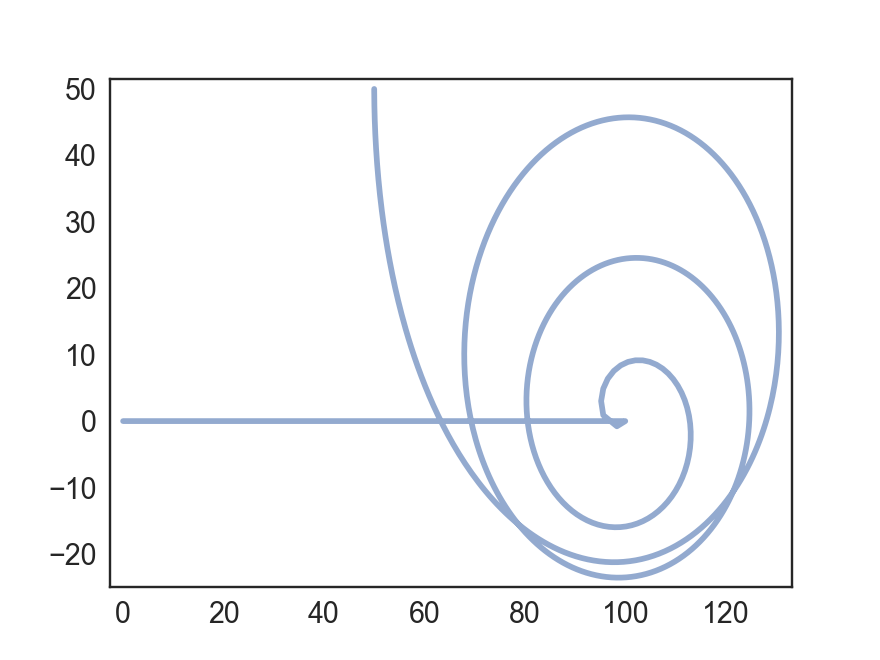

In [35]:
newfig()
plot(system.results.x_p1, system.results.y_p1)

<IPython.core.display.Javascript object>


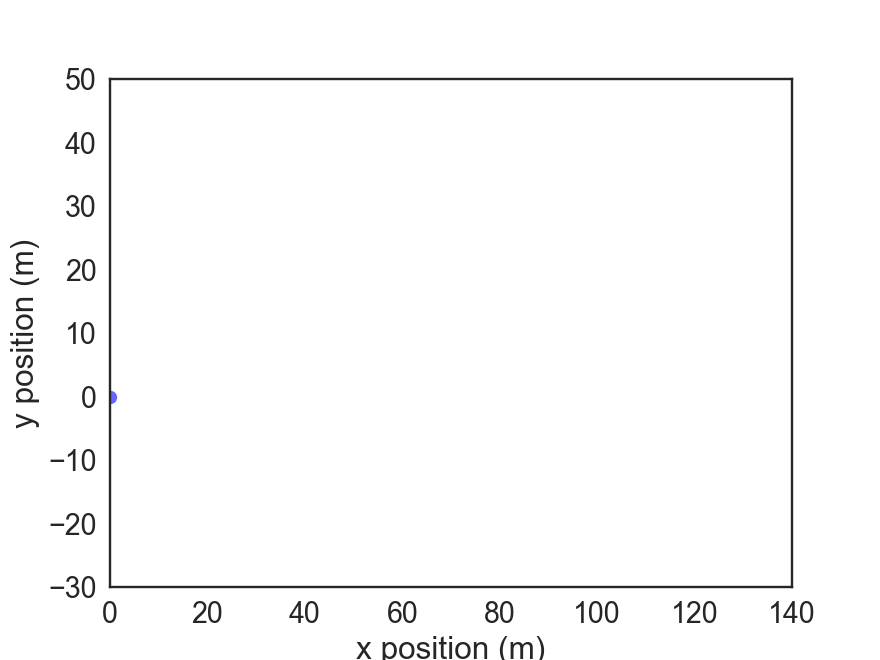

In [38]:
newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim = [0, 140],
         ylim =[-30, 50],
         legend=False)
for x, y in zip(system.results.x_p1, system.results.y_p1):
    plot(x, y, 'bo', update=True)
    #sleep(0.00001)

In [86]:
v = Vector(1, 1)
v

<Quantity([1 1], 'dimensionless')>

In [39]:
a = type(v)
print(a)

NameError: name 'v' is not defined

In [40]:
v1 = v.mag * v

NameError: name 'v' is not defined

In [66]:
type(v1)

pint.unit.build_quantity_class.<locals>.Quantity

In [67]:
v1

<Quantity([ 1.41421356  1.41421356], 'dimensionless')>